 FCN=26.6446 FROM HESSE     STATUS=NOT POSDEF     61 CALLS        1618 TOTAL
                     EDM=9.93293e-08    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.04854e+01   1.62269e+00   6.06060e-05   1.94595e-03
   2  p1          -6.12446e+01   9.47801e+00   3.53994e-04   3.33158e-04
   3  p2          -2.99963e+00   2.31790e-02   1.17611e-05   6.83151e-03
   4  p3           1.97769e+00   1.80417e-02   7.25316e-06  -2.63336e-02
   5  p4           8.71158e+00   2.72965e+00   1.01279e-04  -5.03733e-04
   6  p5           7.16124e+01   2.24388e+01   8.32524e-04  -6.12786e-05
   7  p6           3.01922e+00   1.24006e-02   6.25356e-06   2.50581e-04
   8  p7           5.15744e-01   9.54390e-03   3.86130e-06   8.80256e-03


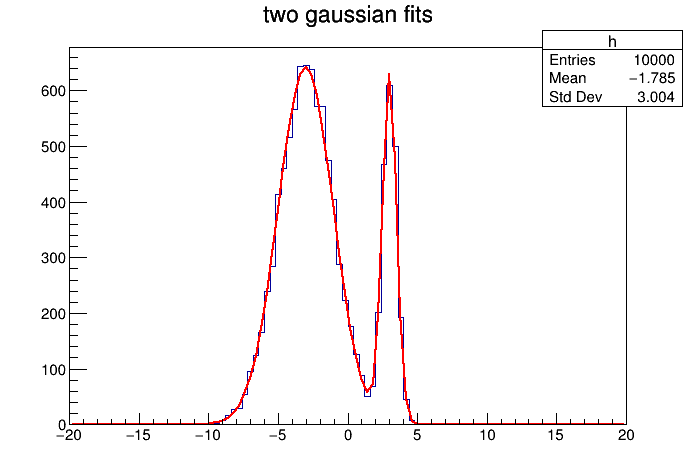

In [10]:
import ROOT as r

#filling histogram with random values from two Gaussians and fit the data

#Create canvas and histogram
c = r.TCanvas()
h = r.TH1D("h", "two gaussian fits", 100, -20, 20)


#Two-Gaussian function for histogram data 
f = r.TF1("f", "[0]*gaus(1) + [4]*gaus(5)", -20, 20)
f.SetParameters(1,1,-3,2,1,1,3,0.5)

#Fitting function (sum of two Gaussians) with fit parameters initialized 
f_fit = r.TF1("f_fit", "[0]*gaus(1) + [4]*gaus(5)", -20, 20)
f_fit.SetParameters(5,3,1,0.5,1,1,3,0.7)

#filling histogram with random data from f
for i in range(10000): 
    h.Fill(f.GetRandom())   

#Fitting histogram with f_fit
h.Fit(f_fit, "B","R")

#Drawing the canvas and now fitted histogram
c.Draw()
h.Draw() 

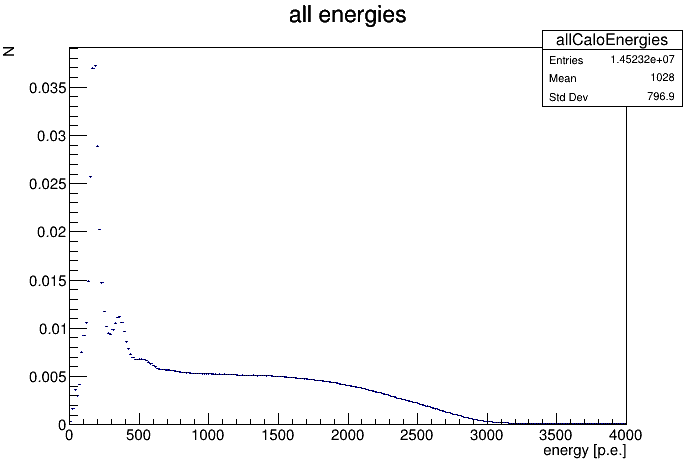

In [9]:
#Take allCaloEnergies histogram and normalize it

import ROOT as r 
from ROOT import gROOT

#Enter "farline" directory in root file
file = r.TFile("gm2PracticeData.root")
file.cd("farline")

#Create histogram object and canvas
h = gROOT.FindObject("allCaloEnergies")
c = r.TCanvas()

#Normalization value
scale_value = 1.0/h.Integral()

#Scale our histogram by our normalization constant
h.Scale(scale_value)

#Draw canvas and histogram
c.Draw()
h.Draw()

40 40


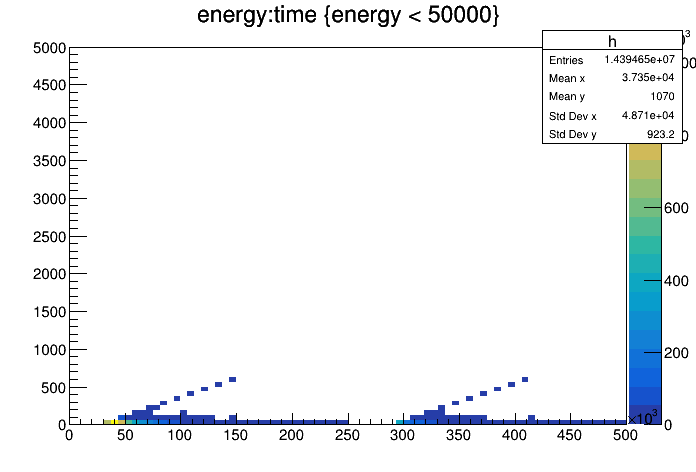

In [8]:
#Plot of energy vs. time

import ROOT as r
from ROOT import gROOT, gDirectory

#Enter "farline" directory in root file
file = r.TFile("gm2PracticeData.root")
file.cd("farline")

#create eventTree object and draw energy:time histogram into h
t = gROOT.FindObject("eventTree")
t.Draw("energy:time>>h", "energy < 50000", "colz")

#create energy:time histogram and canvas
h = gDirectory.Get("h")
c = r.TCanvas()

#determine how many bins currently
print(h.GetNbinsX(), h.GetNbinsY())

#Implement finer binning (80 bins instead of 40 bins)
h.SetBins(80, 0, 500000, 80, 0, 5000)

#Draw the canvas and the energy:time histogram
c.Draw()
h.Draw("colz")

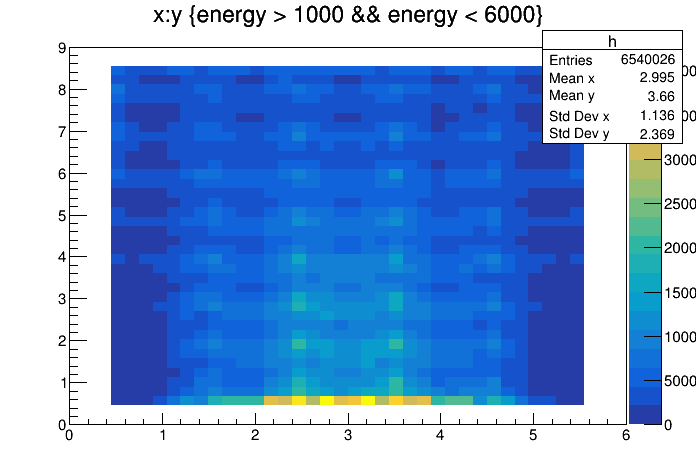

In [14]:
#Plot of x vs. y of positron hits within energy range of 1 - 6 GeV

import ROOT as r
from ROOT import gROOT, gDirectory

#Enter "farline" directory from root file
file = r.TFile("gm2PracticeData.root")
file.cd("farline")

#create canvas and eventTree object
c = r.TCanvas()
t = gROOT.FindObject("eventTree")

#Draw canvas and draw x vs y histogram into h
c.Draw()
t.Draw("x:y>>h", "energy > 1000 && energy < 6000", "colz")

#Create x vs y histogram object
h = gDirectory.Get("h")

#Draw x vs y 
h.Draw("colz")